### Fidelity

In [28]:
using JLD, Plots, LaTeXStrings, DataFrames, GLM

In [29]:
data = JLD.load("../data/fidelity_Lx6Ly6.jld")

β = data["beta"]
β_inset = β[5:15]

T = 1 ./ β

# Fit using last 5 data points
logImF_U2_val = data["logImF_U2_val"][5:15]
data_U2 = DataFrame(X = β_inset[end-4:end], Y = logImF_U2_val[end-4:end])
ols1 = lm(@formula(Y ~ X), data_U2)
f1(x) = ols1.model.pp.beta0[2] * x + ols1.model.pp.beta0[1]

logImF_U4_val = data["logImF_U4_val"][5:15]
data_U4 = DataFrame(X = β_inset[end-4:end], Y = logImF_U4_val[end-4:end])
ols2 = lm(@formula(Y ~ X), data_U4)
f2(x) = ols2.model.pp.beta0[2] * x + ols2.model.pp.beta0[1]

f2 (generic function with 1 method)

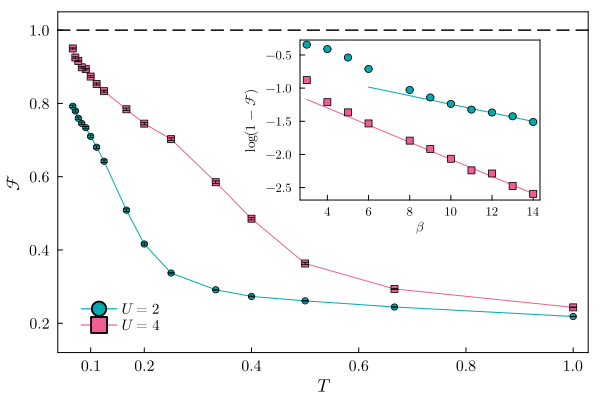

In [30]:
### Plots ###
# rename default colors
cur_colors = get_color_palette(:auto, plot_color(:white))

plt = plot(
    T, data["F_U2_val"], yerror=data["F_U2_err"],
    label=L"U=2",
    xlabel = L"T", ylabel=L"\mathcal{F}",
    xticks = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
    ylim=(0.12, 1.05),
    lc=cur_colors[6], mc=cur_colors[6], 
    marker=(:circle, 3.5), 
    fontfamily="Computer Modern",
    legendfontsize = 10,
    guidefontsize = 12,
    tickfontsize = 10,
    framestyle=:box, grid=:false,
    legend=:bottomleft,
    foreground_color_legend = nothing
)

plot!(
    plt,
    T, data["F_U4_val"], yerror=data["F_U4_err"],
    label=L"U=4",
    lc=cur_colors[7],
    mc=cur_colors[7],
    marker=(:square, 3.5)
)

# F=1 horizontal line
hline!(plt, [1.0], line=(1.5, :dash, :black), label="")

# inset
xtick = [4.0, 6.0, 8.0, 10.0, 12.0, 14.0]
plot!(
    plt,
    f1, 6, 14, 
    xlabel=L"\beta", ylabel=L"\log(1 - \mathcal{F})",
    xticks = xtick,
    label="",
    lc=cur_colors[6], mc=cur_colors[6], 
    inset=bbox(0.5, 0.10, 0.4, 0.4),
    guidefontsize = 9,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    subplot=2
)

scatter!(
    plt[2],
    β_inset, data["logImF_U2_val"][5:15], yerror=data["logImF_U2_err"][5:15],
    marker=(:circle, 4), mc=cur_colors[6], 
    label=false
)

plot!(
    plt[2], 
    f2, 3, 14, 
    lc = cur_colors[7], 
    label=""
)

scatter!(
    plt[2],
    β_inset, data["logImF_U4_val"][5:15], yerror=data["logImF_U4_err"][5:15],
    mc=cur_colors[7],
    marker=(:square, 3.5),
    label=false
)

In [31]:
savefig("../figures/Fidelity_Lx6Ly6.pdf")
savefig("../figures/Fidelity_Lx6Ly6.svg")